# Data Preperation

In [58]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text


In [2]:
df_meta = pd.read_csv('che_meta.csv')
df_credit = pd.read_csv('credit_count.csv')

In [3]:
df_credit = df_credit.drop(columns = ['Unnamed: 0'])

In [4]:
df_credit

,movie_id,cast_num,cast_unspecified,cast_female,cast_male,Actors,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,crew_unspecified,crew_female,crew_male
0,2,4,3,0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0
1,3,7,2,1,4,0.0,2.0,3.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,8.0,0.0,3.0
2,5,24,2,14,8,0.0,10.0,8.0,7.0,16.0,7.0,7.0,3.0,14.0,12.0,0.0,4.0,58.0,7.0,23.0
3,6,15,3,3,9,0.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,5.0,1.0,0.0,3.0,5.0,2.0,9.0
4,11,106,56,3,47,0.0,4.0,1.0,1.0,0.0,1.0,3.0,0.0,6.0,1.0,2.0,1.0,2.0,3.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43013,464207,9,1,1,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43014,465044,6,6,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0
43015,467731,14,7,0,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
43016,468707,6,4,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [5]:
df_meta = df_meta.drop(columns = ['Unnamed: 0','cast_num'])

In [6]:
col = list(df_credit.columns)+['vote_average','total_vote','popularity','vote_count']

In [7]:
df = pd.read_csv('movies_metadata.csv')

/Users/chebian/opt/anaconda3/envs/Python/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

#### Getting month and season

In [9]:
def df_month(x):
    try:
        x = int(str(x)[5:7])
        if x == 12 or x == 1 or x == 2:
            return 'winter'
        elif x <5 and x>=3:
            return'spring'
        elif x<9 and x>=5:
            return 'summer'
        else: 
            return 'fall'
    except ValueError:
        return 0
 

In [10]:
df['season'] = df['release_date'].apply(lambda x: df_month(x) )

In [11]:
df[['id','season']].to_csv('season.csv')

In [12]:
df = df[['id','season']]

In [13]:
df_meta['id'] = df_meta['id'].astype('str')

#### Merging to get season information

In [108]:
df_classification  = df_meta.merge(df, on = 'id', how = 'left')

In [109]:
df_classification['high_popularity'] = df_classification['total_vote'].apply(lambda x: 1 if x>= np.percentile(df_meta['total_vote'],75) else 0)

In [110]:
df_credit['movie_id'] = df_credit['movie_id'].astype('str')

In [111]:
df_classification = df_classification.merge(df_credit, left_on = 'id', right_on = 'movie_id', how = 'left')

In [113]:
df_classification

,index,adult,budget,id_x,imdb_id,original_title,popularity,release_date,revenue,runtime,...,Editing,Lighting,Production,Sound,Visual Effects,Writing,crew_unspecified,crew_female,crew_male,id_y
0,0,False,30000000,862,tt0114709,Toy Story,21.946943,1995.0,373554033.0,81.0,...,11.0,2.0,9.0,16.0,44.0,8.0,73.0,4.0,29.0,862
1,1,False,65000000,8844,tt0113497,Jumanji,17.015539,1995.0,262797249.0,104.0,...,1.0,0.0,6.0,1.0,1.0,4.0,2.0,0.0,14.0,8844
2,2,False,0,15602,tt0113228,Grumpier Old Men,11.712900,1995.0,0.0,101.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,15602
3,3,False,16000000,31357,tt0114885,Waiting to Exhale,3.859495,1995.0,81452156.0,127.0,...,0.0,0.0,5.0,1.0,0.0,3.0,6.0,1.0,3.0,31357
4,4,False,0,11862,tt0113041,Father of the Bride Part II,8.387519,1995.0,76578911.0,106.0,...,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,5.0,11862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36116,39463,False,19000000,328387,tt3531824,Nerve,14.983700,2016.0,85241496.0,96.0,...,3.0,2.0,5.0,6.0,5.0,2.0,28.0,5.0,9.0,328387
36117,39463,False,19000000,328387,tt3531824,Nerve,14.983700,2016.0,85241496.0,96.0,...,3.0,2.0,5.0,6.0,5.0,2.0,28.0,5.0,9.0,328387
36118,39464,False,8000000,389425,tt4060866,Code of Honor,2.202722,2016.0,0.0,106.0,...,3.0,1.0,4.0,6.0,0.0,1.0,25.0,1.0,3.0,389425
36119,39466,False,0,46784,tt0042872,Rabbit's Moon,0.002001,1971.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46784


In [115]:
df_classification = df_classification.drop(columns = ['index','id_x','id_y','adult','budget','imdb_id','original_title',
                                                      'popularity','revenue','Action','director','title',
                                                      'index','vote_average','vote_count',
                                                      'total_vote'])

In [116]:
df_classification = df_classification.rename(columns = {'release_date':'year'})

In [117]:
df_classification = df_classification.dropna() 
df_classification.head()

,year,runtime,en_movie,production_companies_num,production_countries_num,gender,reputable_director,reputable_cast,Adventure,Animation,...,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,crew_unspecified,crew_female,crew_male
0,1995.0,81.0,1,1,1,2.0,1,1,0.0,1.0,...,3.0,11.0,2.0,9.0,16.0,44.0,8.0,73.0,4.0,29.0
1,1995.0,104.0,1,3,1,2.0,1,1,1.0,0.0,...,1.0,1.0,0.0,6.0,1.0,1.0,4.0,2.0,0.0,14.0
2,1995.0,101.0,1,2,1,2.0,0,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
3,1995.0,127.0,1,1,1,2.0,0,1,0.0,0.0,...,1.0,0.0,0.0,5.0,1.0,0.0,3.0,6.0,1.0,3.0
4,1995.0,106.0,1,2,1,2.0,0,1,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,5.0


In [118]:
df_classification[pd.get_dummies(df_classification['season']).columns.tolist()] = pd.get_dummies(df_classification['season'])

In [119]:
df_classification = df_classification.drop(columns = ['season'])

In [120]:
df_classification['gender'] = df_classification['gender'].map({2.0:'Male', 1.0:'Female', 0:'Unspecified'})
df_classification[pd.get_dummies(df_classification['gender']).columns.tolist()] = pd.get_dummies(df_classification['gender'])
df_classification = df_classification.drop(columns = ['gender'])

In [121]:
df_classification = df_classification.merge(df_credit,)

In [122]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36121 entries, 0 to 36120
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      36121 non-null  float64
 1   runtime                   36121 non-null  float64
 2   en_movie                  36121 non-null  int64  
 3   production_companies_num  36121 non-null  int64  
 4   production_countries_num  36121 non-null  int64  
 5   reputable_director        36121 non-null  int64  
 6   reputable_cast            36121 non-null  int64  
 7   Adventure                 36121 non-null  float64
 8   Animation                 36121 non-null  float64
 9   Comedy                    36121 non-null  float64
 10  Crime                     36121 non-null  float64
 11  Documentary               36121 non-null  float64
 12  Drama                     36121 non-null  float64
 13  Family                    36121 non-null  float64
 14  Fantas

In [123]:
df_classification = df_classification.drop(columns = ['id'])

In [153]:
df_classification = df_classification.drop(columns = ['movie_id'])

In [154]:
# class count
class_count_0, class_count_1 = df_classification['high_popularity'].value_counts()

# Separate class
class_0 = df_classification[df_classification['high_popularity'] == 0]
class_1 = df_classification[df_classification['high_popularity'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)


class 0: (27087, 53)
class 1: (9034, 53)


total class of 1 and0: 1    9034
0    9034
Name: high_popularity, dtype: int64


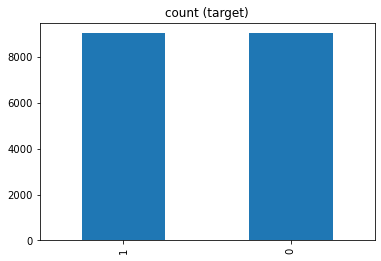

In [201]:
class_0_under = class_0.sample(class_count_1)
df_cl = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and0:",df_cl['high_popularity'].value_counts())# plot the count after under-sampeling
df_cl['high_popularity'].value_counts().plot(kind='bar', title='count (target)')

In [202]:
df_cl['popular'] = df_cl['high_popularity'].apply(lambda x: 'popular' if x == 1 else 'unpopular' )

In [195]:
# generate dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 2)


In [196]:
#genre_map = {}
#num = 0
#for i in df_classification['genre'].value_counts().reset_index()['index'].to_list(): 
    #genre_map[i] = num 
    #num +=1 
    
    

In [158]:
#df_classification['genre'] = df_classification['genre'].map(genre_map)

In [159]:
 #df_classification['season'] =  df_classification['season'].map({'winter':1, 'spring':2, 'summer':3, 'fall':1})

In [203]:
inputs = df_cl.drop(columns = ['high_popularity','popular'])
target = df_cl['popular']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [205]:
len(inputs.columns)

52

In [200]:
target_names = ['0','1']

In [206]:
depth = 1 
score  = {}
while depth<len(inputs.columns):
    model = tree.DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)
    y_predict = model.fit(X_train,y_train).predict(X_test)
    score[depth] = model.score(X_test,y_test)
    print(depth)
    depth+=1
    print(classification_report(y_test, y_predict, target_names=target_names))


    

1
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1802
           1       0.72      0.77      0.74      1812

    accuracy                           0.73      3614
   macro avg       0.73      0.73      0.73      3614
weighted avg       0.73      0.73      0.73      3614

2
              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1813
           1       0.69      0.88      0.77      1801

    accuracy                           0.74      3614
   macro avg       0.76      0.74      0.74      3614
weighted avg       0.76      0.74      0.74      3614

3
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      1807
           1       0.70      0.88      0.78      1807

    accuracy                           0.75      3614
   macro avg       0.77      0.75      0.75      3614
weighted avg       0.77      0.75      0.75      3614

4
           

In [207]:
score 

{1: 0.7315993359158827,
 2: 0.7410071942446043,
 3: 0.7529053680132817,
 4: 0.7802988378527946,
 5: 0.7816823464305479,
 6: 0.7874930824571112,
 7: 0.7836192584394023,
 8: 0.7872163807415606,
 9: 0.7905368013281683,
 10: 0.7827891532927505,
 11: 0.7935805201992252,
 12: 0.7689540675152186,
 13: 0.7711676812396236,
 14: 0.7816823464305479,
 15: 0.7689540675152186,
 16: 0.7656336469286109,
 17: 0.7692307692307693,
 18: 0.7578859988931932,
 19: 0.7520752628666297,
 20: 0.749584947426674,
 21: 0.7443276148312119,
 22: 0.7520752628666297,
 23: 0.7592695074709463,
 24: 0.7476480354178195,
 25: 0.7567791920309906,
 26: 0.7659103486441616,
 27: 0.7520752628666297,
 28: 0.7526286662977311,
 29: 0.7526286662977311,
 30: 0.7515218594355285,
 31: 0.7570558937465413,
 32: 0.7473713337022689,
 33: 0.7523519645821805,
 34: 0.740453790813503,
 35: 0.7457111234089652,
 36: 0.758716104039845,
 37: 0.7581627006087438,
 38: 0.7498616491422246,
 39: 0.7520752628666297,
 40: 0.7429441062534587,
 41: 0.75235

In [208]:
model = tree.DecisionTreeClassifier(max_depth = 7, 
                             random_state = 0)

In [209]:
y_predict = model.fit(X_train,y_train).predict(X_test)

In [210]:
model.score(X_test,y_test)


0.7861095738793581

In [211]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1786
           1       0.78      0.81      0.79      1828

    accuracy                           0.79      3614
   macro avg       0.79      0.79      0.79      3614
weighted avg       0.79      0.79      0.79      3614



In [212]:
fn = inputs.columns.to_list()
cn=['Not Popular','Likely Popular']

In [213]:
r = export_text( model.fit(X_train,y_train)
, feature_names=fn)
print(r)

|--- crew_male <= 4.50
|   |--- production_companies_num <= 0.50
|   |   |--- cast_num <= 16.50
|   |   |   |--- Editing <= 4.00
|   |   |   |   |--- cast_female <= 6.50
|   |   |   |   |   |--- production_countries_num <= 0.50
|   |   |   |   |   |   |--- Costume & Make-Up <= 2.50
|   |   |   |   |   |   |   |--- class: unpopular
|   |   |   |   |   |   |--- Costume & Make-Up >  2.50
|   |   |   |   |   |   |   |--- class: popular
|   |   |   |   |   |--- production_countries_num >  0.50
|   |   |   |   |   |   |--- Directing <= 3.50
|   |   |   |   |   |   |   |--- class: unpopular
|   |   |   |   |   |   |--- Directing >  3.50
|   |   |   |   |   |   |   |--- class: unpopular
|   |   |   |   |--- cast_female >  6.50
|   |   |   |   |   |--- Male <= 0.50
|   |   |   |   |   |   |--- Production <= 3.50
|   |   |   |   |   |   |   |--- class: unpopular
|   |   |   |   |   |   |--- Production >  3.50
|   |   |   |   |   |   |   |--- class: popular
|   |   |   |   |   |--- Male >  0.50
|

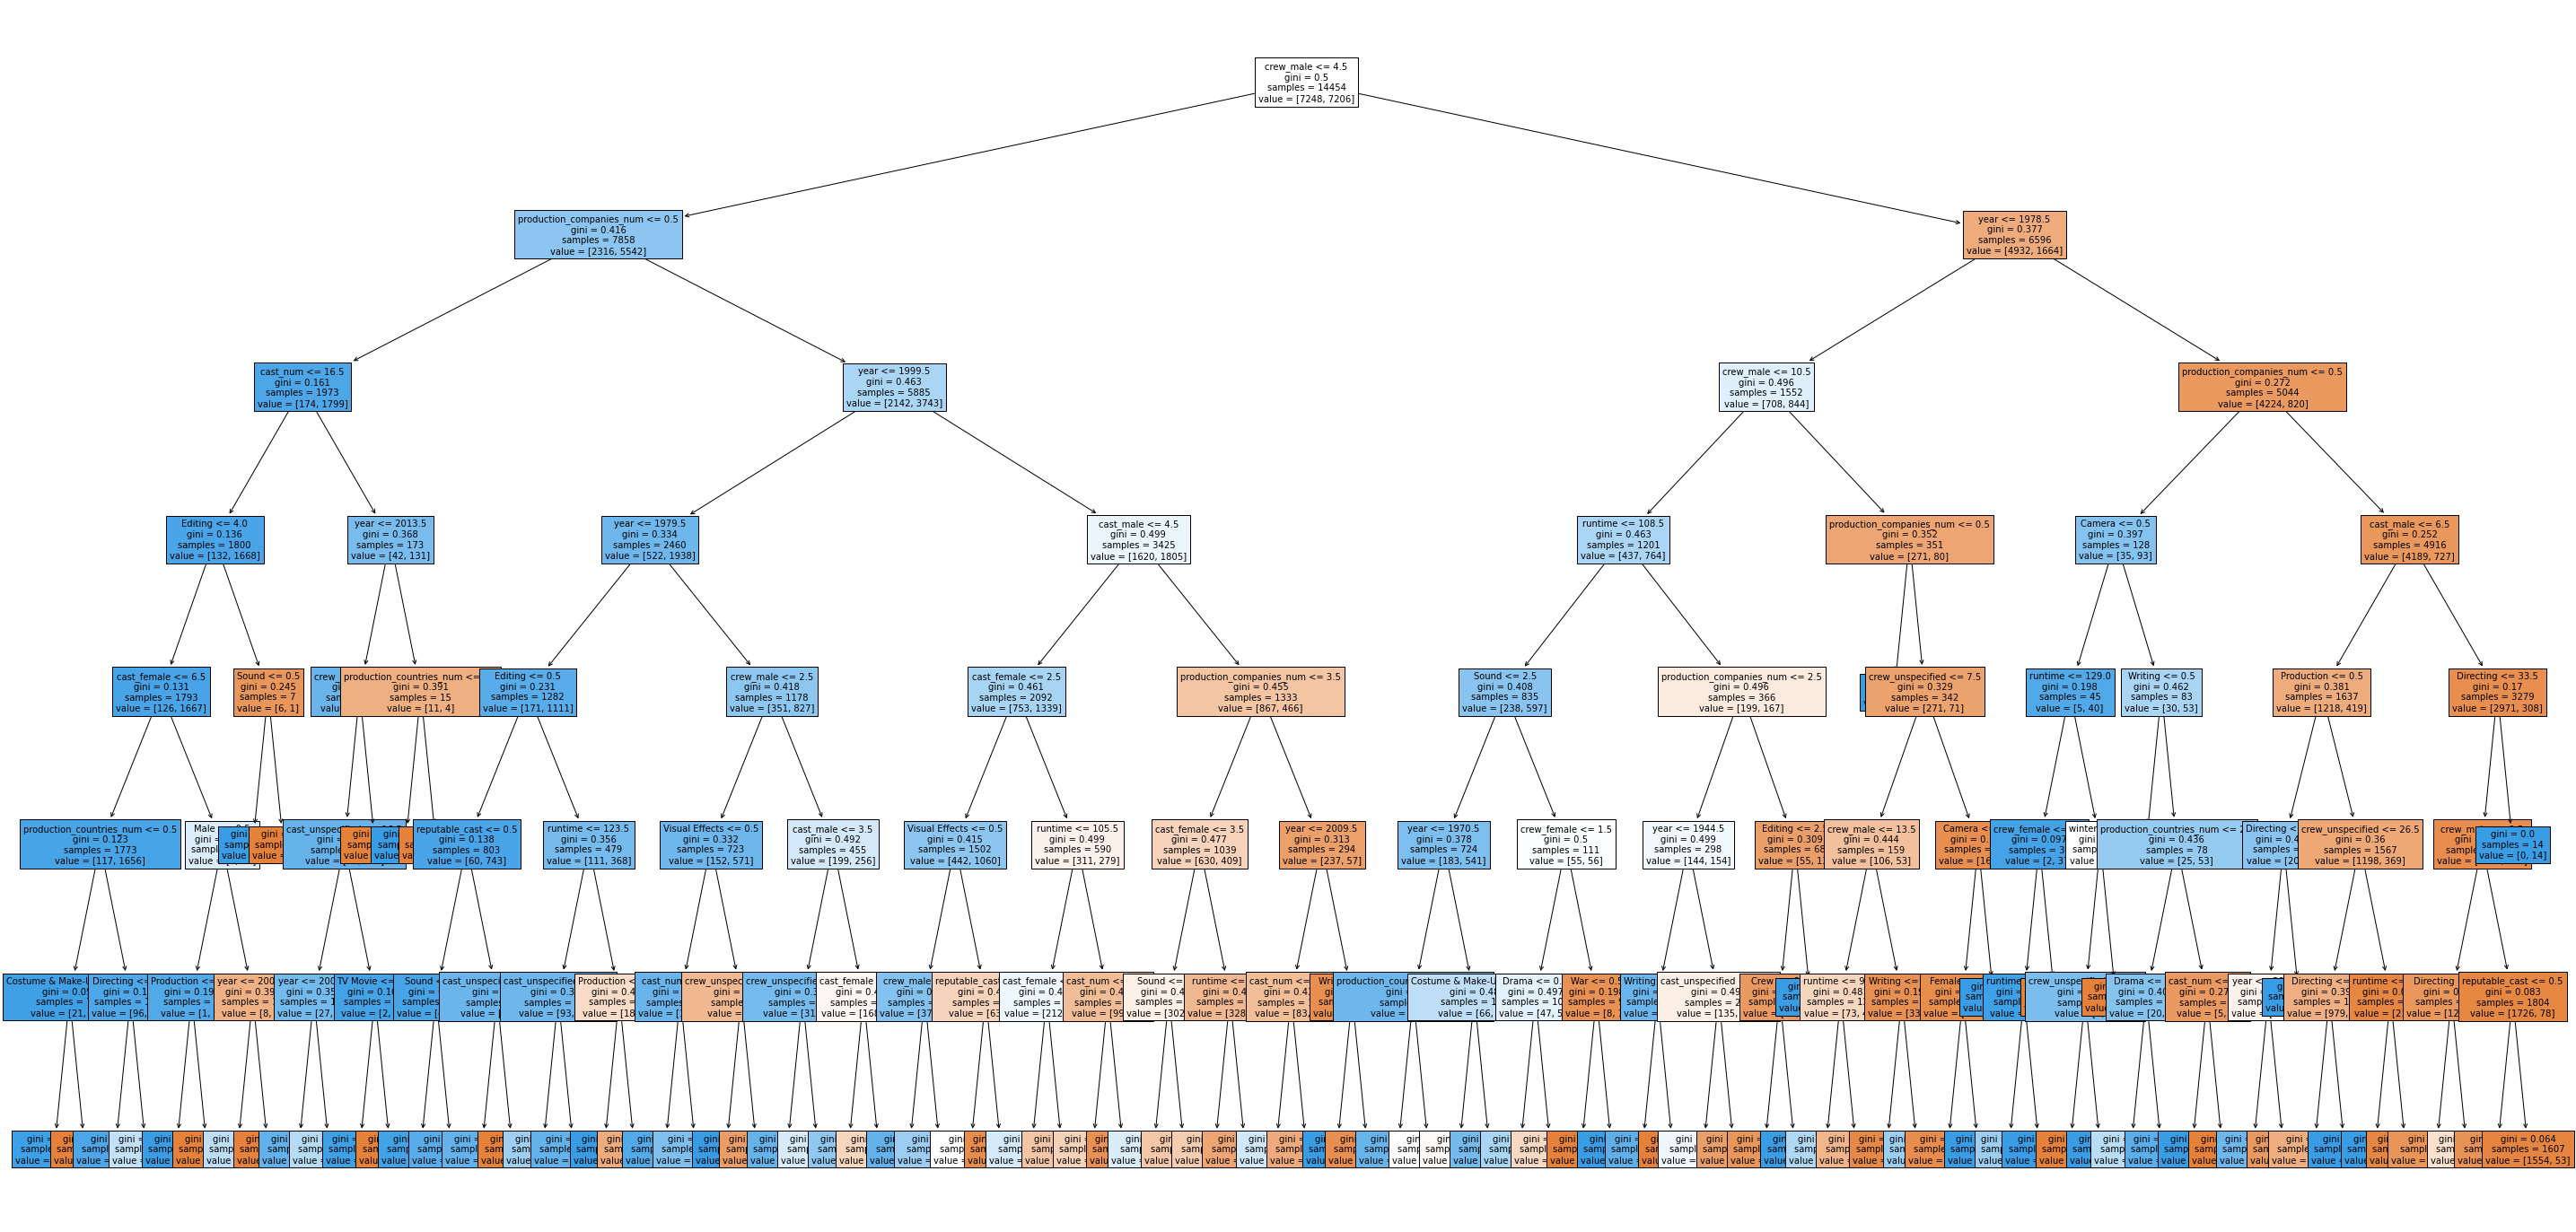

In [214]:
fig = plt.figure(figsize=(50,25))
tree.plot_tree( model.fit(X_train,y_train)
, feature_names=fn, fontsize=10,filled = True);

In [215]:
model_2 = tree.DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)

In [216]:
y_predict_2 = model_2.fit(X_train,y_train).predict(X_test)

In [217]:
print(classification_report(y_test, y_predict_2, target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.62      0.71      1786
           1       0.70      0.89      0.79      1828

    accuracy                           0.76      3614
   macro avg       0.78      0.75      0.75      3614
weighted avg       0.78      0.76      0.75      3614



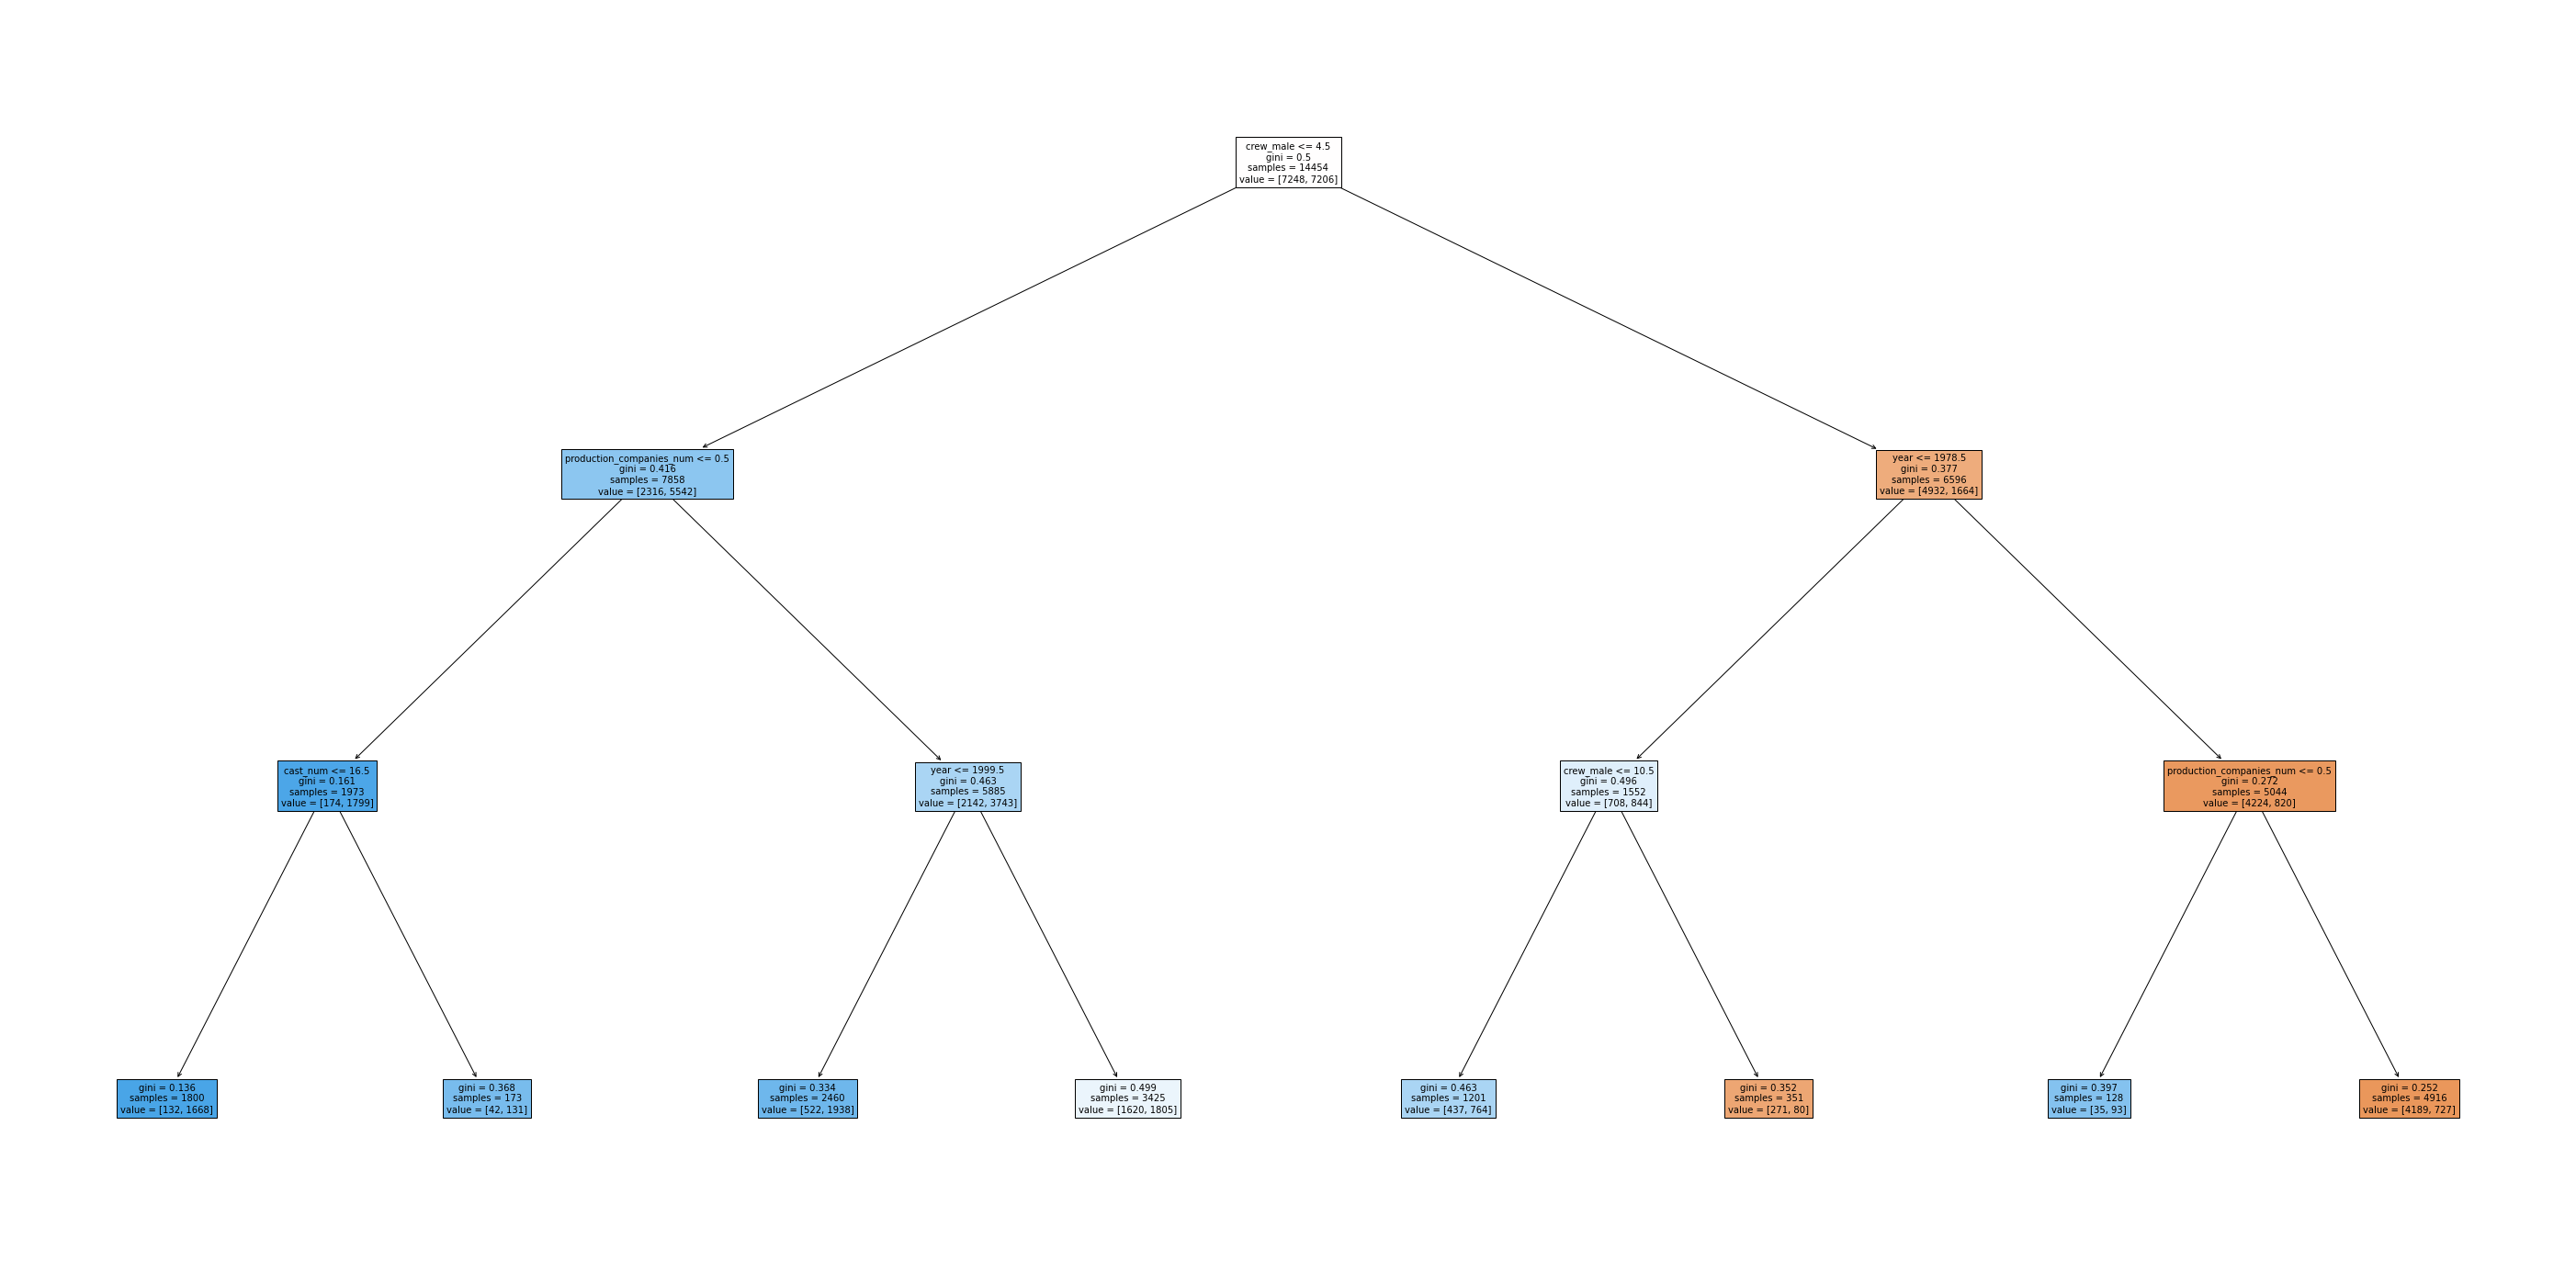

In [218]:
fig = plt.figure(figsize=(50,25))
tree.plot_tree( model_2.fit(X_train,y_train)
, feature_names=fn, fontsize=10,filled = True);

In [191]:
r_2 = export_text( model_2.fit(X_train,y_train)
, feature_names=fn)
print(r)

|--- crew_male <= 4.50
|   |--- production_companies_num <= 1.50
|   |   |--- production_companies_num <= 0.50
|   |   |   |--- production_countries_num <= 0.50
|   |   |   |   |--- crew_female <= 4.00
|   |   |   |   |   |--- runtime <= 206.00
|   |   |   |   |   |   |--- Costume & Make-Up <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Costume & Make-Up >  2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- runtime >  206.00
|   |   |   |   |   |   |--- Male <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Male >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- crew_female >  4.00
|   |   |   |   |   |--- reputable_cast <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- reputable_cast >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- production_countries_num >  0.50
|   |   |   |   |--- Editing <= 3.50
|   |   |   |   |   |--- cast_num <= 18.50
|   |  